# for GA

In [2]:
from pfs.datamodel import PfsDesign, FiberStatus, TargetType
#from pfs_design_tool.pointing_utils import nfutils

In [73]:
pfsdesignDir = "/home/wanqqq/ssp_design/ssp_tgt_test/GA/original/"
pfsdesignDir_ = "/home/wanqqq/ssp_design/ssp_tgt_test/GA/output/"


from glob import glob
pfsdesignIDs = [int(designid.split("-")[1].split(".")[0], 16) for designid in glob(pfsdesignDir+"*")]

for pfsdesignid in pfsdesignIDs:
    pfsDesign0 = PfsDesign.read(pfsdesignid, dirName=pfsdesignDir)
    print(pfsDesign0.filename)
    print(pfsDesign0.catId,pfsDesign0.targetType,set(pfsDesign0.catId))
    #for ii in range(2458):
    #    print(pfsDesign0.catId[ii],pfsDesign0.targetType[ii],set(pfsDesign0.catId))
    #pfsDesign0.write(dirName=pfsdesignDir_, fileName=pfsDesign0.filename)
    """
    pfsDesign0.proposalId="S24B-OT02"
    print(f"{pfsDesign0.filename}, {pfsDesign0.arms}")
    print(f"designId=0x{pfsdesignid:016x} ({pfsDesign0.raBoresight:.2f},{pfsDesign0.decBoresight:.2f},PA={pfsDesign0.posAng:.1f})\n{pfsDesign0.designName}")
    guidestars = sfa.designutils.generate_guidestars_from_gaiadb(
            pfsDesign0.raBoresight,
            pfsDesign0.decBoresight,
            pfsDesign0.posAng,
            "2024-01-24",
            telescope_elevation=None,
            conf=conf,
            guidestar_mag_min=12,
            guidestar_mag_max=22,
            guidestar_neighbor_mag_min=21,
            guidestar_minsep_deg=0.0002778,
            # gaiadb_epoch=2015.0,
            # gaiadb_input_catalog_id=2,
        )
    pfsDesign0.guideStars = guidestars
    pfsDesign0.write(dirName=pfsdesignDir, fileName=pfsDesign0.filename+"_test")
    #"""

pfsDesign-0x3bd02946d0102c33.fits
[   -1 10088    -1 ... 10088 10088    -1] [5 1 4 ... 1 1 5] {10088, 3006, -1, 2007}
pfsDesign-0x7c2788e6e18a995e.fits
[   -1  2007    -1 ... 10088 10088    -1] [5 2 4 ... 1 1 5] {10088, 3006, -1, 2007}
pfsDesign-0x236a3e0531775bcb.fits
[   -1    -1    -1 ... 15002    -1    -1] [5 2 4 ... 1 4 5] {15002, -1}
pfsDesign-0x59d1bda6f276322e.fits
[   -1 10088    -1 ...    -1    -1    -1] [5 1 4 ... 3 3 5] {10088, 3006, -1, 2007}
pfsDesign-0x2bb836031484c46e.fits
[   -1    -1    -1 ...    -1 15001    -1] [5 2 4 ... 2 1 5] {15001, -1}
pfsDesign-0x4eb41eb76b44d4b8.fits
[   -1 10088    -1 ...    -1    -1    -1] [5 1 4 ... 3 4 5] {10088, 3006, -1, 2007}


In [83]:
pfsdesignDir = "/home/wanqqq/ssp_design/ssp_tgt_test/GA/output/design/"

from glob import glob
pfsdesignIDs = [int(designid.split("-")[1].split(".")[0], 16) for designid in glob(pfsdesignDir+"*")]

did=[]
name=[]
ra=[]
dec=[]
pa=[]

for pfsdesignid in pfsdesignIDs:
    pfsDesign0 = PfsDesign.read(pfsdesignid, dirName=pfsdesignDir)
    did.append(pfsDesign0.filename)
    name.append(pfsDesign0.designName)
    ra.append(pfsDesign0.raBoresight)
    dec.append(pfsDesign0.decBoresight)
    pa.append(pfsDesign0.posAng)

dic_sum={"design ID":did, "field name": name, "ppc_ra": ra, "ppc_dec": dec, "ppc_pa": pa}
import pandas as pd
df_sum=pd.DataFrame(dic_sum)


In [86]:
df_sum.to_csv("/home/wanqqq/sum.csv")

In [270]:
#check duplicated fibers
pfsdesignDir = "/home/wanqqq/ssp_design/ssp_tgt_test/GA/output/design/"
pfsdesignid = 0x3fdeaed22f0b2925
pfsDesign0 = PfsDesign.read(pfsdesignid, dirName=pfsdesignDir)
len(pfsDesign0.guideStars)

df_t = pd.DataFrame({"fiberId":pfsDesign0.fiberId, "obCode":pfsDesign0.obCode})
index_dup = df_t.duplicated(subset=['fiberId'], keep=False)
if sum(index_dup)>0:
    print(f"There are duplicated fibers: {df_t[index_dup]}")
else:
    print("No duplicated fiber")

No duplicated fiber


In [271]:
pfsflux = np.array([a[0] if len(a) > 0 else np.nan for a in pfsDesign0.psfFlux])
df_fib = pd.DataFrame(
            data=np.column_stack(
                (
                    pfsDesign0.fiberId, 
                    pfsDesign0.targetType,
                    pfsDesign0.pfiNominal,
                    pfsDesign0.spectrograph,
                    pfsDesign0.fiberHole,
                    pfsflux,
                )
            ),
            columns=["fiberId", "targetType", "pfi_x", "pfi_y", "spec", "fh", "pfsFlux"],
        )

In [272]:
index_dup = df_fib.duplicated(subset=['fiberId'], keep=False)
if sum(index_dup)>0:
    print(f"There are duplicated fibers: {df_fib[index_dup]}")
else:
    print("No duplicated fiber")

No duplicated fiber


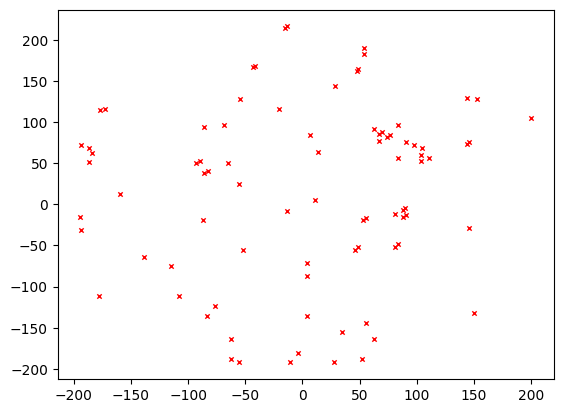

In [273]:
import matplotlib.pyplot as plt
plt.scatter(df_fib[df_fib.targetType==4].pfi_x, df_fib[df_fib.targetType==4].pfi_y, 
                c="r", marker="x", s=10, alpha=1, lw=1, label=f'UNASSIGNED ({len(df_fib[df_fib.targetType==4].pfi_y)})')

In [165]:
import glob
path_ = glob.glob("/home/wanqqq/ssp_design/spt_ssp_observation/runs/2025-03/targets/GA/fluxstd/*")
for tt in path_[:]:
    tb_t = Table.read(tt)
    tb_t["prob_f_star"] = np.full(len(tb_t), 1)
    """
    tb_t["input_catalog_id"] = np.full(len(tb_t), 10092)
    tb_t["proposal_id"] = np.full(len(tb_t), "S25A-OT02")
    tb_t["filter_i"] = np.full(len(tb_t), "i2_hsc")
    tb_t["filter_r"] = np.full(len(tb_t), "")
    tb_t["filter_z"] = np.full(len(tb_t), "")
    tb_t["filter_y"] = np.full(len(tb_t), "")
    tb_t["psf_flux_r"] = np.full(len(tb_t), 0) 
    tb_t["psf_flux_z"] = np.full(len(tb_t), 0) 
    tb_t["psf_flux_y"] = np.full(len(tb_t), 0) 
    tb_t["psf_flux_error_r"] = np.full(len(tb_t), 0) 
    tb_t["psf_flux_error_z"] = np.full(len(tb_t), 0) 
    tb_t["psf_flux_error_y"] = np.full(len(tb_t), 0) 
    #print(tb_t.columns)
    #tb_t.rename_column("psf_flux_err_g", "psf_flux_error_g")
    #tb_t.rename_column("psf_flux_err_i", "psf_flux_error_i")
    #"""
    #tb_t.rename_column("cobraid", "cobraId")
    tb_t.write(tt,overwrite=True)

In [158]:
import glob
path_ = glob.glob("/home/wanqqq/ssp_design/spt_ssp_observation/runs/2025-03/targets/GA/fluxstd/*")
for tt in path_[:1]:
    tb_t = Table.read(tt)
    """
    tb_t["input_catalog_id"] = np.full(len(tb_t), 10092)
    tb_t["proposal_id"] = np.full(len(tb_t), "S25A-OT02")
    tb_t["filter_i"] = np.full(len(tb_t), "i2_hsc")
    tb_t["filter_r"] = np.full(len(tb_t), "")
    tb_t["filter_z"] = np.full(len(tb_t), "")
    tb_t["filter_y"] = np.full(len(tb_t), "")
    tb_t["psf_flux_r"] = np.full(len(tb_t), 0) 
    tb_t["psf_flux_z"] = np.full(len(tb_t), 0) 
    tb_t["psf_flux_y"] = np.full(len(tb_t), 0) 
    tb_t["psf_flux_error_r"] = np.full(len(tb_t), 0) 
    tb_t["psf_flux_error_z"] = np.full(len(tb_t), 0) 
    tb_t["psf_flux_error_y"] = np.full(len(tb_t), 0) 
    #print(tb_t.columns)
    #tb_t.rename_column("psf_flux_err_g", "psf_flux_error_g")
    #tb_t.rename_column("psf_flux_err_i", "psf_flux_error_i")
    #"""
    #tb_t.write(tt,overwrite=True)

In [159]:
tb_t

obj_id,ra,dec,pmra,pmdec,parallax,epoch,tract,patch,target_type_id,input_catalog_id,ob_code,proposal_id,priority,effective_exptime,filter_g,psf_flux_g,psf_flux_err_g,filter_i,psf_flux_i,psf_flux_err_i,cobraId,pfi_X,pfi_Y
int64,float64,float64,float64,float64,float64,str8,int64,str3,int32,int64,str35,str19,int32,float32,str5,float64,float64,str5,float64,float64,int32,float64,float64
1017907265339,229.153118399,67.8682324544,2.720363925025112,-4.581921428941298,1.9385546027439706,J2016.00,0,"0,0",1,1017907265339,SSP_GA_20250325_umi_1017907265339_m,SSP_GA_20250325_umi,9,7200.0,g_hsc,3930.5161268565275,40.51874541378414,i_hsc,26707.759683745677,112.7756971080488,1,-10.063662559460113,5.582554515555773
1017907265044,229.218889587,67.855931703,-0.21804092449325438,0.11348692868002414,0.0004999999999999999,J2016.00,0,"0,0",1,1017907265044,SSP_GA_20250325_umi_1017907265044_m,SSP_GA_20250325_umi,0,3600.0,g_hsc,210843.98837583917,173.72032294909658,i_hsc,575125.8770504829,356.30376000001917,2,-13.976180605464515,-2.351335312648733
1017907252327,229.24961230900004,67.8696875983,-0.8809713979891519,-1.7221053662967758,0.0030572452938383756,J2016.00,0,"0,0",1,1017907252327,SSP_GA_20250325_umi_1017907252327_m,SSP_GA_20250325_umi,9,7200.0,g_hsc,6045.509507771166,42.25236218078861,i_hsc,33889.47463471226,110.66765508073276,4,-9.566340956303948,-6.0370879620589974
1017907265596,229.236812089,67.8792010812,-0.27407734597460004,0.08239393147392016,0.0004999999999999998,J2016.00,0,"0,0",1,1017907265596,SSP_GA_20250325_umi_1017907265596_m,SSP_GA_20250325_umi,9,7200.0,g_hsc,16388.21149864053,57.284882606012395,i_hsc,21431.6045029602,93.66231128907027,3,-6.526979179986294,-4.484654112951014
1017907265760,229.31304843200002,67.8909014334,0.8044761531074954,-1.7987733081091457,0.7751373548062764,J2016.00,0,"0,0",1,1017907265760,SSP_GA_20250325_umi_1017907265760_m,SSP_GA_20250325_umi,9,1800.0,g_hsc,172048.35252324998,200.5189584851212,i_hsc,793257.5343581802,429.60748302605526,5,-2.752525392035703,-13.647692468195107
1017907252044,229.34499683999996,67.8578261546,-19.414285177549015,12.80491471811119,4.268489161047687,J2016.00,0,"0,0",1,1017907252044,SSP_GA_20250325_umi_1017907252044_m,SSP_GA_20250325_umi,9,5400.0,g_hsc,3783.3054211808058,34.06829466304648,i_hsc,85545.32274734361,143.14743785662188,6,-13.303282349164155,-17.534895662560785
1017907265540,229.38717523999995,67.8741616978,-0.11478080990352811,0.519882911113777,0.0718385059106081,J2016.00,0,"0,0",1,1017907265540,SSP_GA_20250325_umi_1017907265540_m,SSP_GA_20250325_umi,0,5400.0,g_hsc,42635.167707393215,84.81351153581588,i_hsc,86340.92101367442,153.17563486502294,7,-8.061836177840705,-22.604547782023275
1017907264904,229.38325420699994,67.8445364887,-6.203328558827786,-1.0406251512674884,0.07456721076846508,J2016.00,0,"0,0",1,1017907264904,SSP_GA_20250325_umi_1017907264904_m,SSP_GA_20250325_umi,9,7200.0,g_hsc,20470.992216444945,65.39379498018697,i_hsc,31469.231045194185,99.4763264823715,8,-17.544417516224417,-22.185942153971048
1017907265743,229.429961744,67.8861996355,-4.496980278883081,-8.454306025447575,0.3815467141359867,J2016.00,0,"0,0",1,1017907265743,SSP_GA_20250325_umi_1017907265743_m,SSP_GA_20250325_umi,9,5400.0,g_hsc,16553.210468651134,70.86430212263788,i_hsc,72001.12817161524,165.4698648589706,9,-4.188482715313517,-27.732083031945


In [171]:
# check design files generated by obs. and laszlo
pfsdesignDir = "/home/wanqqq/ssp_design/GA/spt_ssp_observation/runs/2025-03/pfs_designs/GA/"
from glob import glob
pfsdesignIDs = [int(designid.split("-")[-1].split(".")[0], 16) for designid in glob(pfsdesignDir+"*")]

did=[]
name=[]
ra=[]
dec=[]
pa=[]

for pfsdesignid in pfsdesignIDs:
    pfsDesign0 = PfsDesign.read(pfsdesignid, dirName=pfsdesignDir)
    did.append(pfsDesign0.filename)
    name.append(pfsDesign0.designName)
    ra.append(pfsDesign0.raBoresight)
    dec.append(pfsDesign0.decBoresight)
    pa.append(pfsDesign0.posAng)
    

dic_sum={"design ID":did, "field name": name, "ppc_ra": ra, "ppc_dec": dec, "ppc_pa": pa}
import pandas as pd
df_sum=pd.DataFrame(dic_sum)
tb_las=Table.from_pandas(df_sum).group_by("design ID")

In [175]:
# check design files generated by obs. and laszlo
pfsdesignDir = "/home/wanqqq/ssp_design/spt_ssp_observation/runs/2025-03/pfs_designs/GA/"
from glob import glob
pfsdesignIDs = [int(designid.split("-")[-1].split(".")[0], 16) for designid in glob(pfsdesignDir+"*")]

did=[]
name=[]
ra=[]
dec=[]
pa=[]

for pfsdesignid in pfsdesignIDs:
    pfsDesign0 = PfsDesign.read(pfsdesignid, dirName=pfsdesignDir)
    did.append(pfsDesign0.filename)
    name.append(pfsDesign0.designName)
    ra.append(pfsDesign0.raBoresight)
    dec.append(pfsDesign0.decBoresight)
    pa.append(pfsDesign0.posAng)

dic_sum={"design ID":did, "field name": name, "ppc_ra": ra, "ppc_dec": dec, "ppc_pa": pa}
import pandas as pd
df_sum=pd.DataFrame(dic_sum)
tb_obs=Table.from_pandas(df_sum).group_by("design ID")

In [180]:
from astropy.table import Table, join
tb_compare=join(tb_obs,tb_las,keys="design ID")

In [184]:
tb_compare["ppc_pa_1"] == tb_compare["ppc_pa_2"] 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [185]:
tb_compare

design ID,field name_1,ppc_ra_1,ppc_dec_1,ppc_pa_1,field name_2,ppc_ra_2,ppc_dec_2,ppc_pa_2
str33,str18,float64,float64,float64,str26,float64,float64,float64
pfsDesign-0x014e3d07535c5708.fits,SSP_GA_umi_P04_V01,228.2,67.5,0.0,Ursa Minor P004/008 V25/48,228.2,67.5,0.0
pfsDesign-0x02636fd50b573ab7.fits,SSP_GA_umi_P03_V02,228.5,66.6,0.0,Ursa Minor P003/008 V20/48,228.5,66.6,0.0
pfsDesign-0x0490c3ba160a9c5a.fits,SSP_GA_umi_P07_V01,228.0,66.955,0.0,Ursa Minor P007/008 V43/48,228.0,66.955,0.0
pfsDesign-0x04e8b29e2a350006.fits,SSP_GA_umi_P02_V00,225.2,66.55,0.0,Ursa Minor P002/008 V12/48,225.2,66.55,0.0
pfsDesign-0x08ae326870687d34.fits,SSP_GA_umi_P04_V04,228.2,67.5,0.0,Ursa Minor P004/008 V28/48,228.2,67.5,0.0
pfsDesign-0x09b5887e05a58122.fits,SSP_GA_umi_P01_V05,226.0,67.8,0.0,Ursa Minor P001/008 V11/48,226.0,67.8,0.0
pfsDesign-0x18eefb8762b423ff.fits,SSP_GA_umi_P05_V04,226.3,67.5,0.0,Ursa Minor P005/008 V34/48,226.3,67.5,0.0
pfsDesign-0x1b7f7666039901a3.fits,SSP_GA_umi_P04_V05,228.2,67.5,0.0,Ursa Minor P004/008 V29/48,228.2,67.5,0.0
pfsDesign-0x2010acadf09abd14.fits,SSP_GA_umi_P00_V05,229.2,67.9,0.0,Ursa Minor P000/008 V05/48,229.2,67.9,0.0


# for GC

In [6]:
def input_csv_revise(inputDir):
    from astropy.table import Table
    from glob import glob
    lst_filename = glob(inputDir + "*")
    
    for filename in lst_filename[:]:
        print(filename)
        tb_all = Table.read(filename)
        tb_all["input_catalog_id"] = tb_all["catId"]

        ### modify input science dataframe
        tb_sci = tb_all[tb_all["target_type"]==1]

        #check type and catId
        print(f"target type = {set(tb_sci['target_type'])}, catId = {set(tb_sci['catId'])}")

        tb_sci["input_catalog_id"][tb_sci["target_type"]==1] = 10090
        tb_sci["tract"] = 0
        tb_sci["patch"] = 0
        tb_sci["epoch"] = ["J2000" for i in range(len(tb_sci))]
        tb_sci["catalog_id"] = tb_sci["input_catalog_id"]
        tb_sci["target_type_id"] = tb_sci["target_type"]
        tb_sci["proposal_id"] = "S24B-OT02"
        tb_sci["effective_exptime"] = tb_sci["exptime"]
        tb_sci["filter_g"] = "g_hsc"
        tb_sci["filter_r"] = "r2_hsc"
        tb_sci["filter_i"] = "i2_hsc"
        tb_sci["filter_z"] = "z_hsc"
        tb_sci["filter_y"] = "y_hsc"
        tb_sci["psf_flux_g"] = tb_sci["g_hsc"]
        tb_sci["psf_flux_r"] = tb_sci["r2_hsc"]
        tb_sci["psf_flux_i"] = tb_sci["i2_hsc"]
        tb_sci["psf_flux_z"] = tb_sci["z_hsc"]
        tb_sci["psf_flux_y"] = tb_sci["y_hsc"]
        tb_sci["psf_flux_error_g"] = tb_sci["g_hsc_err"]
        tb_sci["psf_flux_error_r"] = tb_sci["r2_hsc_err"]
        tb_sci["psf_flux_error_i"] = tb_sci["i2_hsc_err"]
        tb_sci["psf_flux_error_z"] = tb_sci["z_hsc_err"]
        tb_sci["psf_flux_error_y"] = tb_sci["y_hsc_err"]

        tb_sci_update = tb_sci['obj_id',
                         'ra',
                         'dec',
                         'pmra',
                         'pmdec',
                         'parallax',
                         'epoch',
                         'tract',
                         'patch',
                         'catalog_id',
                         'target_type_id',
                         'input_catalog_id',
                         'ob_code',
                         'proposal_id',
                         'priority',
                         'effective_exptime',
                         'filter_g',
                         'filter_r',
                         'filter_i',
                         'filter_z',
                         'filter_y',
                         'psf_flux_g',
                         'psf_flux_r',
                         'psf_flux_i',
                         'psf_flux_z',
                         'psf_flux_y',
                         'psf_flux_error_g',
                         'psf_flux_error_r',
                         'psf_flux_error_i',
                         'psf_flux_error_z',
                         'psf_flux_error_y',
                        ]

        ### modify input sky dataframe
        tb_sky = tb_all[tb_all["target_type"]==2]

        #check type and catId
        print(f"target type = {set(tb_sky['target_type'])}, catId = {set(tb_sky['catId'])}")

        tb_sky["sky_id"] = 0
        tb_sky["obj_id_orig"] = 0
        tb_sky["tract"] = 0
        tb_sky["patch"] = 0
        tb_sky["epoch"] = ["J2000" for i in range(len(tb_sky))]
        tb_sky["target_type_id"] = tb_sky["target_type"]
        tb_sky["mag_thresh"] = np.nan
        tb_sky["version"] = np.nan
        tb_sky["created_at"] = np.nan
        tb_sky["updated_at"] = np.nan

        tb_sky_update = tb_sky['sky_id',
                             'obj_id',
                             'obj_id_orig',
                             'ra',
                             'dec',
                             'epoch',
                             'tract',
                             'patch',
                             'target_type_id',
                             'input_catalog_id',
                             'mag_thresh',
                             'version',
                             'created_at',
                             'updated_at',
                             'pmra',
                             'pmdec',
                             'parallax']

        ### modify input flux dataframe
        tb_fluxstd = tb_all[tb_all["target_type"]==3]

        #check type and catId
        print(f"target type = {set(tb_fluxstd['target_type'])}, catId = {set(tb_fluxstd['catId'])}")

        tb_fluxstd["fluxstd_id"] = 0
        tb_fluxstd["tract"] = 0
        tb_fluxstd["patch"] = 0
        tb_fluxstd["epoch"] = ["J2016" for i in range(len(tb_fluxstd))]
        tb_fluxstd["target_type_id"] = tb_fluxstd["target_type"]
        tb_fluxstd["psf_mag_g"] = 999
        tb_fluxstd["psf_mag_r"] = 999
        tb_fluxstd["psf_mag_i"] = 999
        tb_fluxstd["psf_mag_z"] = 999
        tb_fluxstd["psf_mag_y"] = 999
        tb_fluxstd["psf_mag_j"] = 999
        tb_fluxstd["psf_flux_g"] = tb_fluxstd["psf_flux_g"]
        tb_fluxstd["psf_flux_r"] = tb_fluxstd["psf_flux_r"]
        tb_fluxstd["psf_flux_i"] = tb_fluxstd["psf_flux_i"]
        tb_fluxstd["psf_flux_z"] = tb_fluxstd["psf_flux_z"]
        tb_fluxstd["psf_flux_y"] = tb_fluxstd["psf_flux_y"]
        tb_fluxstd["psf_flux_j"] = 0
        tb_fluxstd["prob_f_star"] = 1.0
        tb_fluxstd["flags_dist"] = np.nan
        tb_fluxstd["flags_ebv"] = np.nan
        tb_fluxstd["version"] = np.nan
        tb_fluxstd["created_at"] = np.nan
        tb_fluxstd["updated_at"] = np.nan
        tb_fluxstd["filter_g"] = "g_ps1"
        tb_fluxstd["filter_r"] = "r_ps1"
        tb_fluxstd["filter_i"] = "i_ps1"
        tb_fluxstd["filter_z"] = "z_ps1"
        tb_fluxstd["filter_y"] = "y_ps1"
        tb_fluxstd["filter_j"] = ""
        tb_fluxstd["psf_mag_error_g"] = 999
        tb_fluxstd["psf_mag_error_r"] = 999
        tb_fluxstd["psf_mag_error_i"] = 999
        tb_fluxstd["psf_mag_error_z"] = 999
        tb_fluxstd["psf_mag_error_y"] = 999
        tb_fluxstd["psf_mag_error_j"] = 999
        tb_fluxstd["psf_flux_error_g"] = tb_fluxstd["psf_flux_error_g"]
        tb_fluxstd["psf_flux_error_r"] = tb_fluxstd["psf_flux_error_r"]
        tb_fluxstd["psf_flux_error_i"] = tb_fluxstd["psf_flux_error_i"]
        tb_fluxstd["psf_flux_error_z"] = tb_fluxstd["psf_flux_error_z"]
        tb_fluxstd["psf_flux_error_y"] = tb_fluxstd["psf_flux_error_y"]
        tb_fluxstd["psf_flux_error_j"] = 0
        tb_fluxstd["teff_brutus"] = np.nan
        tb_fluxstd["teff_brutus_low"] = np.nan
        tb_fluxstd["teff_brutus_high"] = np.nan
        tb_fluxstd["logg_brutus"] = np.nan
        tb_fluxstd["logg_brutus_low"] = np.nan
        tb_fluxstd["logg_brutus_high"] = np.nan
        tb_fluxstd["teff_gspphot"] = np.nan
        tb_fluxstd["teff_gspphot_lower"] = np.nan
        tb_fluxstd["teff_gspphot_upper"] = np.nan
        tb_fluxstd["is_fstar_gaia"] = False

        tb_fluxstd_update = tb_fluxstd['fluxstd_id',
                                         'obj_id',
                                         'ra',
                                         'dec',
                                         'epoch',
                                         'parallax',
                                         'parallax_error',
                                         'pmra',
                                         'pmra_error',
                                         'pmdec',
                                         'pmdec_error',
                                         'tract',
                                         'patch',
                                         'target_type_id',
                                         'input_catalog_id',
                                         'psf_mag_g',
                                         'psf_mag_r',
                                         'psf_mag_i',
                                         'psf_mag_z',
                                         'psf_mag_y',
                                         'psf_mag_j',
                                         'psf_flux_g',
                                         'psf_flux_r',
                                         'psf_flux_i',
                                         'psf_flux_z',
                                         'psf_flux_y',
                                         'psf_flux_j',
                                         'prob_f_star',
                                         'flags_dist',
                                         'flags_ebv',
                                         'version',
                                         'created_at',
                                         'updated_at',
                                         'filter_g',
                                         'filter_r',
                                         'filter_i',
                                         'filter_z',
                                         'filter_y',
                                         'filter_j',
                                         'psf_mag_error_g',
                                         'psf_mag_error_r',
                                         'psf_mag_error_i',
                                         'psf_mag_error_z',
                                         'psf_mag_error_y',
                                         'psf_mag_error_j',
                                         'psf_flux_error_g',
                                         'psf_flux_error_r',
                                         'psf_flux_error_i',
                                         'psf_flux_error_z',
                                         'psf_flux_error_y',
                                         'psf_flux_error_j',
                                         'teff_brutus',
                                         'teff_brutus_low',
                                         'teff_brutus_high',
                                         'logg_brutus',
                                         'logg_brutus_low',
                                         'logg_brutus_high',
                                         'teff_gspphot',
                                         'teff_gspphot_lower',
                                         'teff_gspphot_upper',
                                         'is_fstar_gaia']
        return tb_sci_update, tb_sky_update, tb_fluxstd_update 

In [301]:
aa,bb,cc=input_csv_revise("/home/wanqqq/ssp_design/ssp_tgt_test/GC/input/tgt/")

/home/wanqqq/ssp_design/ssp_tgt_test/GC/input/tgt/field_a_L3_visit1_final_targets.ecsv
target type = {1}, catId = {11}
target type = {2}, catId = {2007}
target type = {3}, catId = {3006}


In [344]:
dd=np.loadtxt("/home/wanqqq/ssp_design/ssp_tgt_test/GC/input/netflow_output/field_a_L3_visit1.txt",dtype="str")
dd_=dd.T
df_netflow_out = pd.DataFrame({"obj_id":[int(ii.split('_')[-1]) for ii in dd_[0]],"fiberId":dd_[1]})

In [345]:
aa_=Table.to_pandas(aa)
bb_=Table.to_pandas(bb)
cc_=Table.to_pandas(cc)

In [348]:
pd.merge(cc_,df_netflow_out,on=["obj_id"])["fiberId"].isnull().values.any()

False

In [355]:
vis={111:0,222:1,223:2}
vis.update({333:4,666:0})

In [356]:
vis

{111: 0, 222: 1, 223: 2, 333: 4, 666: 0}

In [235]:
#check duplicated fibers
pfsdesignDir = "/home/wanqqq/ssp_design/ssp_tgt_test/GC/output/design/"
pfsdesignid = 0x275f98ed2ea7b41a
pfsDesign0 = PfsDesign.read(pfsdesignid, dirName=pfsdesignDir)

sum(pfsDesign0.targetType==1)



1520

In [286]:
len(aa),len(bb),len(cc)

(1622, 400, 169)

In [288]:
bb

sky_id,obj_id,obj_id_orig,ra,dec,epoch,tract,patch,target_type_id,input_catalog_id,mag_thresh,version,created_at,updated_at,pmra,pmdec,parallax
int64,int64,int64,float64,float64,str5,int64,int64,int32,int32,float64,float64,float64,float64,float64,float64,float64
0,17878225393,0,36.76963269040054,-5.773635905999854,J2000,0,0,2,2007,nan,nan,nan,nan,0.0,0.0,1e-07
0,17878262901,0,36.733332915287576,-5.751307879934964,J2000,0,0,2,2007,nan,nan,nan,nan,0.0,0.0,1e-07
0,17878232489,0,36.86640472201334,-5.774774765079852,J2000,0,0,2,2007,nan,nan,nan,nan,0.0,0.0,1e-07
0,17878261261,0,36.86708786922281,-5.733788718355096,J2000,0,0,2,2007,nan,nan,nan,nan,0.0,0.0,1e-07
0,17878250509,0,36.54669973235623,-5.434390601595943,J2000,0,0,2,2007,nan,nan,nan,nan,0.0,0.0,1e-07
0,17878252564,0,36.534331092745255,-5.413167629525557,J2000,0,0,2,2007,nan,nan,nan,nan,0.0,0.0,1e-07
0,17878222419,0,36.57045507103465,-5.393554366957615,J2000,0,0,2,2007,nan,nan,nan,nan,0.0,0.0,1e-07
0,17878249007,0,36.71874913721042,-5.688809142649662,J2000,0,0,2,2007,nan,nan,nan,nan,0.0,0.0,1e-07
0,17878226063,0,36.68034964629796,-5.627555289574539,J2000,0,0,2,2007,nan,nan,nan,nan,0.0,0.0,1e-07


In [237]:
df_t = pd.DataFrame({"fiberId":pfsDesign0.fiberId, "obCode":pfsDesign0.obCode})


In [247]:
np.loadtxt("/home/wanqqq/ssp_design/ssp_tgt_test/GC/input/netflow_output/field_a_L3_visit1.txt", dtype="str")

array([['_Sky_3254233918', '2', '-13.76691', '-0.13272', '37.10049',
        '-5.24340'],
       ['_Cos_37493913442868165', '3', '-6.18631', '-6.49075',
        '37.12036', '-5.21963'],
       ['_Cos_37493913442868275', '5', '-5.64009', '-11.72103',
        '37.13677', '-5.21786'],
       ...,
       ['_Cos_37493788888817821', '2392', '183.77802', '-108.34040',
        '37.43004', '-4.63734'],
       ['_Cos_37493788888819280', '2393', '194.78753', '-109.60539',
        '37.43297', '-4.60511'],
       ['_Cos_37493788888819229', '2394', '194.32498', '-103.30033',
        '37.41396', '-4.60611']], dtype='<U25')

In [275]:
cc

fluxstd_id,obj_id,ra,dec,epoch,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,tract,patch,target_type_id,input_catalog_id,psf_mag_g,psf_mag_r,psf_mag_i,psf_mag_z,psf_mag_y,psf_mag_j,psf_flux_g,psf_flux_r,psf_flux_i,psf_flux_z,psf_flux_y,psf_flux_j,prob_f_star,flags_dist,flags_ebv,version,created_at,updated_at,filter_g,filter_r,filter_i,filter_z,filter_y,filter_j,psf_mag_error_g,psf_mag_error_r,psf_mag_error_i,psf_mag_error_z,psf_mag_error_y,psf_mag_error_j,psf_flux_error_g,psf_flux_error_r,psf_flux_error_i,psf_flux_error_z,psf_flux_error_y,psf_flux_error_j,teff_brutus,teff_brutus_low,teff_brutus_high,logg_brutus,logg_brutus_low,logg_brutus_high,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,is_fstar_gaia
int64,int64,float64,float64,str5,float64,float64,float64,float64,float64,float64,int64,int64,int32,int32,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,str5,str5,str5,str5,str5,str1,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool
0,2488669974479071104,36.77748284764486,-5.788299416733037,J2016,0.5480399588238507,1.0156459999999998,2.1758854323621133,1.0539681,-0.6843897104859475,1.1416979,0,0,3,3006,999,999,999,999,999,999,21363.21,26036.74,27346.78,27173.56,37683.08,0,nan,nan,nan,nan,nan,nan,g_ps1,r_ps1,i_ps1,z_ps1,y_ps1,,999,999,999,999,999,999,437.58,719.01,616.86,763.12,3700.16,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,False
0,2488675987433429376,36.6685932432966,-5.652930167768668,J2016,-0.1051991318488235,0.28040856,2.7923021843345643,0.30839992,-4.705251900006388,0.26674348,0,0,3,3006,999,999,999,999,999,999,60554.46,75277.63,84696.62,86494.05,88410.98,0,nan,nan,nan,nan,nan,nan,g_ps1,r_ps1,i_ps1,z_ps1,y_ps1,,999,999,999,999,999,999,518.35,609.09,429.36,976.04,1655.54,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,False
0,2488677537917095424,36.701757224998005,-5.626685468784264,J2016,-0.2419810896843739,0.9680129,-0.5804416949552088,0.9918464,-0.3641397307577133,1.1893341999999998,0,0,3,3006,999,999,999,999,999,999,22154.72,23181.76,28911.2,34803.78,51374.36,0,nan,nan,nan,nan,nan,nan,g_ps1,r_ps1,i_ps1,z_ps1,y_ps1,,999,999,999,999,999,999,675.11,614.64,323.85,1010.64,1925.59,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,False
0,2488677155664407808,36.79595084511386,-5.606520100407384,J2016,1.040036735260431,0.47331697,-0.7266516332306979,0.57812107,-2.388538846164088,0.5831751000000001,0,0,3,3006,999,999,999,999,999,999,38906.89,45076.11,48818.69,46681.67,45530.94,0,nan,nan,nan,nan,nan,nan,g_ps1,r_ps1,i_ps1,z_ps1,y_ps1,,999,999,999,999,999,999,220.6,775.36,513.8,579.23,2247.16,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,False
0,2488697672723772672,36.84943913934293,-5.598466017760823,J2016,0.2554082492877373,0.13376833,5.777637075150786,0.182602,-11.771624282047677,0.14335251,0,0,3,3006,999,999,999,999,999,999,204656.93,269541.96,302988.36,310560.34,313030.1,0,nan,nan,nan,nan,nan,nan,g_ps1,r_ps1,i_ps1,z_ps1,y_ps1,,999,999,999,999,999,999,1090.83,1049.14,1025.83,1592.94,4993.55,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,False
0,2488690384163838848,36.71289152056949,-5.515122469281051,J2016,0.1909803658249187,0.404358,-0.1882793027376103,0.42515057,-2.942109964245615,0.39550102,0,0,3,3006,999,999,999,999,999,999,37203.7,47387.8,51516.53,52127.38,56320.5,0,nan,nan,nan,nan,nan,nan,g_ps1,r_ps1,i_ps1,z_ps1,y_ps1,,999,999,999,999,999,999,641.15,665.64,416.88,984.61,1430.66,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,False
0,2488714985736520576,36.69545612786517,-5.466688522035314,J2016,0.7607856459083808,1.5298873,-0.9317971238100906,2.1018538,-4.723420004333753,2.2633095,0,0,3,3006,999,999,999,999,999,999,16378.19,19701.83,20231.41,19496.04,23480.42,0,nan,nan,nan,nan,nan,nan,g_ps1,r_ps1,i_ps1,z_ps1,y_ps1,,999,999,999,999,999,999,476.86,400.79,347.11,320.09,4019.2,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,False
0,2488715226254692480,36.65620253673686,-5.4572746468

In [276]:
filename="/home/wanqqq/ssp_design/ssp_tgt_test/GC/input/tgt/field_a_L1_visit1_final_targets.ecsv"
tb_ppc = Table.read("/home/wanqqq/ssp_design/ssp_tgt_test/GC/input/ppc/ppc_sum.csv")

In [279]:
any(ppc_code_ in filename for ppc_code_ in tb_ppc["ppc_code"])

True

In [292]:
func = lambda list_, string: tuple(filter(lambda x: x in string, list_))
tb_ppc[tb_ppc["ppc_code"]==func(tb_ppc["ppc_code"], filename)[0]]["ppc_code"].value[0]

'field_a_L3'

In [115]:
from glob import glob
pfsdesignDir = "/home/wanqqq/ssp_design/ssp_tgt_test/GC/output_original_design/design/"
pfsdesignIDs = [int(designid.split("-")[1].split(".")[0], 16) for designid in glob(pfsdesignDir+"*")]

aa=[]
for pfsdesignid in pfsdesignIDs:
    #read in pfsdesign
    pfsDesign0 = PfsDesign.read(pfsdesignid, dirName=pfsdesignDir)
    print(pfsDesign0.designName,sum(pfsDesign0.targetType==1),sum(pfsDesign0.targetType==2),sum(pfsDesign0.targetType==3),pfsDesign0.pfsDesignId)
    aa.append([sum(pfsDesign0.targetType==1),sum(pfsDesign0.targetType==2),sum(pfsDesign0.targetType==3)])
#lst_filename = glob(pfsdesignDir + "*")
#for filename in lst_filename[:1]:

field_e_L2_visit2 1270 400 200 9215092000281422374
field_e_L2_visit2 1271 400 200 4436555009661484590
field_b_L1_visit1 1576 400 186 1117817769868868259
field_a_L1_visit2 1523 400 177 3599947545864935605
field_a_L1_visit1 1648 400 177 2771945932877889354
field_e_L2_visit1 1530 400 200 1415587563072690167
field_b_L1_visit2 1430 400 186 4624899618588289840
field_b_L3_visit1 1416 400 200 7823659621805725356
field_a_L4_visit1 1484 400 193 710055095562255256
field_a_L3_visit2 1440 400 169 7729438373104615687
field_a_L4_visit2 1336 400 193 2766194939069766857
field_a_L3_visit1 1622 400 169 2593211698470058571
field_b_L3_visit2 1237 400 200 555310040305691375
field_b_L2_visit2 1321 400 186 6102494597700807844
field_e_L1_visit1 1567 400 200 7894651948389908594
field_b_L2_visit1 1513 400 186 5801841486417782741
field_e_L1_visit2 1328 400 200 5778597930306700785
field_e_L3_visit1 1499 400 200 8432450730874497807
field_e_L4_visit2 1133 400 200 7933169356347676040
field_e_L3_visit2 1207 400 200 12

In [25]:
from astropy.table import Table
bb=[]
lst_filename = glob("/home/wanqqq/ssp_design/ssp_tgt_test/GC/input/tgt/" + "*")
for filename in lst_filename[:]:
    tb_all = Table.read(filename)
    print(filename, sum(tb_all["target_type"]==1), sum(tb_all["target_type"]==2), sum(tb_all["target_type"]==3))
    bb.append([sum(tb_all["target_type"]==1), sum(tb_all["target_type"]==2), sum(tb_all["target_type"]==3)])

/home/wanqqq/ssp_design/ssp_tgt_test/GC/input/tgt/field_e_L2_visit2_final_targets.ecsv 1271 400 200
/home/wanqqq/ssp_design/ssp_tgt_test/GC/input/tgt/field_b_L1_visit1_final_targets.ecsv 1576 400 186
/home/wanqqq/ssp_design/ssp_tgt_test/GC/input/tgt/field_a_L1_visit2_final_targets.ecsv 1523 400 177
/home/wanqqq/ssp_design/ssp_tgt_test/GC/input/tgt/field_a_L1_visit1_final_targets.ecsv 1648 400 177
/home/wanqqq/ssp_design/ssp_tgt_test/GC/input/tgt/field_e_L2_visit1_final_targets.ecsv 1530 400 200
/home/wanqqq/ssp_design/ssp_tgt_test/GC/input/tgt/field_b_L1_visit2_final_targets.ecsv 1430 400 186
/home/wanqqq/ssp_design/ssp_tgt_test/GC/input/tgt/field_b_L3_visit1_final_targets.ecsv 1416 400 200
/home/wanqqq/ssp_design/ssp_tgt_test/GC/input/tgt/field_a_L4_visit1_final_targets.ecsv 1484 400 193
/home/wanqqq/ssp_design/ssp_tgt_test/GC/input/tgt/field_a_L3_visit2_final_targets.ecsv 1440 400 169
/home/wanqqq/ssp_design/ssp_tgt_test/GC/input/tgt/field_a_L4_visit2_final_targets.ecsv 1336 400 193


In [ ]:
lst_sci1=[1179,1490,1423,1561,1424,1336,1337,1393,1336,1240,1521,1147,1225,1479,1428,1233,1405,1040,1104,1375]
lst_sci2=[1179,1490,1423,1561,1424,1336,1337,1393,1336,1240,1521,1147,1225,1479,1428,1233,1405,1040,1104,1375]

Text(0, 0.5, 'N fiber')

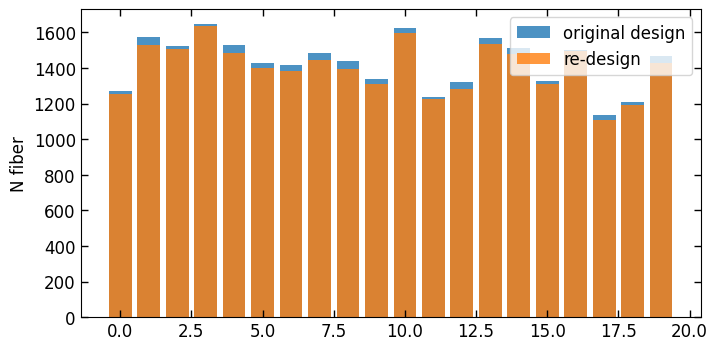

In [45]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8,4))
plt.bar(np.arange(20), np.array(bb)[:,0],alpha=0.8,label="original design")
plt.bar(np.arange(20), [uu-int(np.random.uniform(4,50,1)) for uu in np.array(bb)[:,0]],alpha=0.8,label="re-design")

plt.legend()
plt.ylabel("N fiber")

In [27]:
bb

[[1271, 400, 200],
 [1576, 400, 186],
 [1523, 400, 177],
 [1648, 400, 177],
 [1530, 400, 200],
 [1430, 400, 186],
 [1416, 400, 200],
 [1484, 400, 193],
 [1440, 400, 169],
 [1336, 400, 193],
 [1622, 400, 169],
 [1237, 400, 200],
 [1321, 400, 186],
 [1567, 400, 200],
 [1513, 400, 186],
 [1328, 400, 200],
 [1499, 400, 200],
 [1133, 400, 200],
 [1207, 400, 200],
 [1468, 400, 200]]

# revise input format

In [53]:
def input_csv_revise(inputDir, outDir, ppcPath, netflowDir):
    from astropy.table import Table
    import numpy as np
    import logging
    logger = logging.getLogger(__name__)
    import pandas as pd

    from glob import glob
    lst_filename = glob(inputDir + "*")

    tb_ppc = Table.read(ppcPath)            
    
    for filename in lst_filename[:]:
        print(filename)
        tb_all = Table.read(filename)
        func = lambda list_, string: tuple(filter(lambda x: x in string, list_))
        tb_ppc_t = tb_ppc[tb_ppc["ppc_code"]==func(tb_ppc["ppc_code"], filename)[0]]

        netflow_out=np.loadtxt(netflowDir+tb_ppc_t["ppc_code"].value[0]+".txt",dtype="str")
        netflow_out_=netflow_out.T
        df_netflow_out = pd.DataFrame({"obj_id":[int(ii.split('_')[-1]) for ii in netflow_out_[0]],"cobraId":netflow_out_[1].astype(np.int32), "pfi_X":netflow_out_[2].astype(np.float64), "pfi_Y":netflow_out_[3].astype(np.float64)})
        
        tb_all["input_catalog_id"] = tb_all["catId"]

        ### modify input science dataframe
        tb_sci = tb_all[tb_all["target_type"]==1]

        #check type and catId
        print(f"target type = {set(tb_sci['target_type'])}, catId = {set(tb_sci['catId'])}")

        tb_sci["input_catalog_id"][tb_sci["target_type"]==1] = 10090
        tb_sci["tract"] = 0
        tb_sci["patch"] = 0
        tb_sci["epoch"] = ["J2000" for i in range(len(tb_sci))]
        tb_sci["catalog_id"] = tb_sci["input_catalog_id"]
        tb_sci["target_type_id"] = tb_sci["target_type"]
        tb_sci["proposal_id"] = "S24B-OT02"
        tb_sci["effective_exptime"] = tb_sci["exptime"]
        tb_sci["filter_g"] = "g_hsc"
        tb_sci["filter_r"] = "r2_hsc"
        tb_sci["filter_i"] = "i2_hsc"
        tb_sci["filter_z"] = "z_hsc"
        tb_sci["filter_y"] = "y_hsc"
        tb_sci["psf_flux_g"] = tb_sci["g_hsc"]
        tb_sci["psf_flux_r"] = tb_sci["r2_hsc"]
        tb_sci["psf_flux_i"] = tb_sci["i2_hsc"]
        tb_sci["psf_flux_z"] = tb_sci["z_hsc"]
        tb_sci["psf_flux_y"] = tb_sci["y_hsc"]
        tb_sci["psf_flux_error_g"] = tb_sci["g_hsc_err"]
        tb_sci["psf_flux_error_r"] = tb_sci["r2_hsc_err"]
        tb_sci["psf_flux_error_i"] = tb_sci["i2_hsc_err"]
        tb_sci["psf_flux_error_z"] = tb_sci["z_hsc_err"]
        tb_sci["psf_flux_error_y"] = tb_sci["y_hsc_err"]

        tb_sci_update = tb_sci['obj_id',
                         'ra',
                         'dec',
                         'pmra',
                         'pmdec',
                         'parallax',
                         'epoch',
                         'tract',
                         'patch',
                         'catalog_id',
                         'target_type_id',
                         'input_catalog_id',
                         'ob_code',
                         'proposal_id',
                         'priority',
                         'effective_exptime',
                         'filter_g',
                         'filter_r',
                         'filter_i',
                         'filter_z',
                         'filter_y',
                         'psf_flux_g',
                         'psf_flux_r',
                         'psf_flux_i',
                         'psf_flux_z',
                         'psf_flux_y',
                         'psf_flux_error_g',
                         'psf_flux_error_r',
                         'psf_flux_error_i',
                         'psf_flux_error_z',
                         'psf_flux_error_y',
                        ]

        ### modify input sky dataframe
        tb_sky = tb_all[tb_all["target_type"]==2]

        #check type and catId
        print(f"target type = {set(tb_sky['target_type'])}, catId = {set(tb_sky['catId'])}")

        tb_sky["sky_id"] = [int(ii.split("_")[-1]) for ii in tb_sky["ob_code"]]
        tb_sky["obj_id_orig"] = 0
        tb_sky["tract"] = 0
        tb_sky["patch"] = 0
        tb_sky["epoch"] = ["J2000" for i in range(len(tb_sky))]
        tb_sky["target_type_id"] = tb_sky["target_type"]
        tb_sky["mag_thresh"] = np.nan
        tb_sky["version"] = np.nan
        tb_sky["created_at"] = np.nan
        tb_sky["updated_at"] = np.nan

        tb_sky_update = tb_sky['sky_id',
                             'obj_id',
                             'obj_id_orig',
                             'ra',
                             'dec',
                             'epoch',
                             'tract',
                             'patch',
                             'target_type_id',
                             'input_catalog_id',
                             'mag_thresh',
                             'version',
                             'created_at',
                             'updated_at',
                             'pmra',
                             'pmdec',
                             'parallax']

        ### modify input flux dataframe
        tb_fluxstd = tb_all[tb_all["target_type"]==3]

        #check type and catId
        print(f"target type = {set(tb_fluxstd['target_type'])}, catId = {set(tb_fluxstd['catId'])}")

        tb_fluxstd["fluxstd_id"] = 0
        tb_fluxstd["tract"] = 0
        tb_fluxstd["patch"] = 0
        tb_fluxstd["epoch"] = ["J2016" for i in range(len(tb_fluxstd))]
        tb_fluxstd["target_type_id"] = tb_fluxstd["target_type"]
        tb_fluxstd["psf_mag_g"] = 999
        tb_fluxstd["psf_mag_r"] = 999
        tb_fluxstd["psf_mag_i"] = 999
        tb_fluxstd["psf_mag_z"] = 999
        tb_fluxstd["psf_mag_y"] = 999
        tb_fluxstd["psf_mag_j"] = 999
        tb_fluxstd["psf_flux_g"] = tb_fluxstd["psf_flux_g"]
        tb_fluxstd["psf_flux_r"] = tb_fluxstd["psf_flux_r"]
        tb_fluxstd["psf_flux_i"] = tb_fluxstd["psf_flux_i"]
        tb_fluxstd["psf_flux_z"] = tb_fluxstd["psf_flux_z"]
        tb_fluxstd["psf_flux_y"] = tb_fluxstd["psf_flux_y"]
        tb_fluxstd["psf_flux_j"] = 0
        tb_fluxstd["prob_f_star"] = 1.0
        tb_fluxstd["flags_dist"] = np.nan
        tb_fluxstd["flags_ebv"] = np.nan
        tb_fluxstd["version"] = np.nan
        tb_fluxstd["created_at"] = np.nan
        tb_fluxstd["updated_at"] = np.nan
        tb_fluxstd["filter_g"] = "g_ps1"
        tb_fluxstd["filter_r"] = "r_ps1"
        tb_fluxstd["filter_i"] = "i_ps1"
        tb_fluxstd["filter_z"] = "z_ps1"
        tb_fluxstd["filter_y"] = "y_ps1"
        tb_fluxstd["filter_j"] = ""
        tb_fluxstd["psf_mag_error_g"] = 999
        tb_fluxstd["psf_mag_error_r"] = 999
        tb_fluxstd["psf_mag_error_i"] = 999
        tb_fluxstd["psf_mag_error_z"] = 999
        tb_fluxstd["psf_mag_error_y"] = 999
        tb_fluxstd["psf_mag_error_j"] = 999
        tb_fluxstd["psf_flux_error_g"] = tb_fluxstd["psf_flux_error_g"]
        tb_fluxstd["psf_flux_error_r"] = tb_fluxstd["psf_flux_error_r"]
        tb_fluxstd["psf_flux_error_i"] = tb_fluxstd["psf_flux_error_i"]
        tb_fluxstd["psf_flux_error_z"] = tb_fluxstd["psf_flux_error_z"]
        tb_fluxstd["psf_flux_error_y"] = tb_fluxstd["psf_flux_error_y"]
        tb_fluxstd["psf_flux_error_j"] = 0
        tb_fluxstd["teff_brutus"] = np.nan
        tb_fluxstd["teff_brutus_low"] = np.nan
        tb_fluxstd["teff_brutus_high"] = np.nan
        tb_fluxstd["logg_brutus"] = np.nan
        tb_fluxstd["logg_brutus_low"] = np.nan
        tb_fluxstd["logg_brutus_high"] = np.nan
        tb_fluxstd["teff_gspphot"] = np.nan
        tb_fluxstd["teff_gspphot_lower"] = np.nan
        tb_fluxstd["teff_gspphot_upper"] = np.nan
        tb_fluxstd["is_fstar_gaia"] = False

        tb_fluxstd_update = tb_fluxstd['fluxstd_id',
                                         'obj_id',
                                         'ra',
                                         'dec',
                                         'epoch',
                                         'parallax',
                                         'parallax_error',
                                         'pmra',
                                         'pmra_error',
                                         'pmdec',
                                         'pmdec_error',
                                         'tract',
                                         'patch',
                                         'target_type_id',
                                         'input_catalog_id',
                                         'psf_mag_g',
                                         'psf_mag_r',
                                         'psf_mag_i',
                                         'psf_mag_z',
                                         'psf_mag_y',
                                         'psf_mag_j',
                                         'psf_flux_g',
                                         'psf_flux_r',
                                         'psf_flux_i',
                                         'psf_flux_z',
                                         'psf_flux_y',
                                         'psf_flux_j',
                                         'prob_f_star',
                                         'flags_dist',
                                         'flags_ebv',
                                         'version',
                                         'created_at',
                                         'updated_at',
                                         'filter_g',
                                         'filter_r',
                                         'filter_i',
                                         'filter_z',
                                         'filter_y',
                                         'filter_j',
                                         'psf_mag_error_g',
                                         'psf_mag_error_r',
                                         'psf_mag_error_i',
                                         'psf_mag_error_z',
                                         'psf_mag_error_y',
                                         'psf_mag_error_j',
                                         'psf_flux_error_g',
                                         'psf_flux_error_r',
                                         'psf_flux_error_i',
                                         'psf_flux_error_z',
                                         'psf_flux_error_y',
                                         'psf_flux_error_j',
                                         'teff_brutus',
                                         'teff_brutus_low',
                                         'teff_brutus_high',
                                         'logg_brutus',
                                         'logg_brutus_low',
                                         'logg_brutus_high',
                                         'teff_gspphot',
                                         'teff_gspphot_lower',
                                         'teff_gspphot_upper',
                                         'is_fstar_gaia']

        df_sci = Table.to_pandas(tb_sci_update[:])
        df_fluxstds = Table.to_pandas(tb_fluxstd_update[:])
        df_sky = Table.to_pandas(tb_sky_update[:])

        df_sci_ = pd.merge(df_sci,df_netflow_out,on=["obj_id"])
        df_sky_ = pd.merge(df_sky,df_netflow_out,left_on=["sky_id"],right_on=["obj_id"])
        df_sky_["obj_id"] = df_sky_["obj_id_x"]
        df_sky_=df_sky_.drop(columns=["obj_id_x", "obj_id_y"])
        df_fluxstds_ = pd.merge(df_fluxstds,df_netflow_out,on=["obj_id"])

        print(f"{len(df_sci_)}/{len(df_sci)} science targets have FiberId")
        print(f"{len(df_sky_)}/{len(df_sky)} sky have FiberId")
        print(f"{len(df_fluxstds_)}/{len(df_fluxstds)} fluxstd have FiberId")

        import os
        if not os.path.exists(outDir):
                os.makedirs(outDir, exist_ok=True)
        if not os.path.exists(outDir + "science/"):
            os.makedirs(outDir + "science/", exist_ok=True)
        if not os.path.exists(outDir + "sky/"):
            os.makedirs(outDir + "sky/", exist_ok=True)
        if not os.path.exists(outDir + "fluxstd/"):
            os.makedirs(outDir + "fluxstd/", exist_ok=True)

        tb_sci_fin = Table.from_pandas(df_sci_)
        tb_sky_fin = Table.from_pandas(df_sky_)
        tb_fluxstd_fin = Table.from_pandas(df_fluxstds_)

        tb_sci_fin.meta["ppc_code"]=str(tb_ppc_t["ppc_code"].value[0])
        tb_sci_fin.meta["ppc_ra"]=float(tb_ppc_t["ppc_ra"].value[0])
        tb_sci_fin.meta["ppc_dec"]=float(tb_ppc_t["ppc_dec"].value[0])
        tb_sci_fin.meta["ppc_pa"]=float(tb_ppc_t["ppc_pa"].value[0])

        tb_sky_fin.meta["ppc_code"]=str(tb_ppc_t["ppc_code"].value[0])
        tb_sky_fin.meta["ppc_ra"]=float(tb_ppc_t["ppc_ra"].value[0])
        tb_sky_fin.meta["ppc_dec"]=float(tb_ppc_t["ppc_dec"].value[0])
        tb_sky_fin.meta["ppc_pa"]=float(tb_ppc_t["ppc_pa"].value[0])

        tb_fluxstd_fin.meta["ppc_code"]=str(tb_ppc_t["ppc_code"].value[0])
        tb_fluxstd_fin.meta["ppc_ra"]=float(tb_ppc_t["ppc_ra"].value[0])
        tb_fluxstd_fin.meta["ppc_dec"]=float(tb_ppc_t["ppc_dec"].value[0])
        tb_fluxstd_fin.meta["ppc_pa"]=float(tb_ppc_t["ppc_pa"].value[0])
        #'''
        tb_sci_fin.write(outDir + "science/" + tb_ppc_t["ppc_code"].value[0]+".ecsv", overwrite=True)
        tb_sky_fin.write(outDir + "sky/" + tb_ppc_t["ppc_code"].value[0]+".ecsv", overwrite=True)
        tb_fluxstd_fin.write(outDir + "fluxstd/" + tb_ppc_t["ppc_code"].value[0]+".ecsv", overwrite=True)

    return tb_sci_update, tb_sky_update, tb_fluxstd_update 

In [112]:
## revise ppcList
from astropy.table import Table
import numpy as np
import logging
logger = logging.getLogger(__name__)
import pandas as pd

tb_ppc = Table.read("/home/wanqqq/ssp_design/ssp_tgt_test/GC/input_revise/ppcList.ecsv")
tb_ppc["ppc_exptime"]=1800
tb_ppc["ppc_nframe"]=4
tb_ppc["ppc_code"]=tb_ppc["ppc_code"].astype('U30')
tb_ppc["ppc_ra"]=tb_ppc["ppc_ra"].astype(np.float64)
tb_ppc["ppc_dec"]=tb_ppc["ppc_dec"].astype(np.float64)
tb_ppc["ppc_pa"]=tb_ppc["ppc_pa"].astype(np.float32)
tb_ppc["ppc_priority"]=1
tb_ppc["ppc_obstime"]=(tb_ppc["ppc_obstime"]).astype('U22')

tb_ppc.meta={}

tb_ppc.meta["pfs.datamodel"]="w.2025.06"
tb_ppc.meta["pfs_utils"]="w.2025.06"
tb_ppc.meta["ics_cobraCharmer"] ="1.4.16"
tb_ppc.meta["ics_cobraOps"] = "81d6a313d3eea21fcccfd970596617668c0f8edb"
tb_ppc.meta["pfs_instdata"] ="1.8.14"
tb_ppc.meta["dot_penalty"]="None"
tb_ppc.meta["ets_fiberalloc"]="v2.0"
tb_ppc.meta["gurobi"]="10.0.3"
tb_ppc.meta["black_dot_radius_margin"]=1.65
tb_ppc.meta["cobra_coach_module_version"]="None"
tb_ppc.meta["sm"]=[1, 2, 3, 4]
tb_ppc.meta["gurobi parameters"]=[0,1,0,0,0.6,0,5.0e-3,0,0,4] #seed, presolve, method, degenmoves, heuristics, mipfocus, mipgap, PreSOS2Encoding, PreSOS1Encoding, threads

tb_ppc.write("/home/wanqqq/ssp_design/ssp_tgt_test/GC/input_revise/ppcList.ecsv", overwrite=True)

In [55]:
tb_ppc

ppc_code,ppc_ra,ppc_dec,ppc_pa,ppc_resolution,ppc_priority,ppc_obstime,ppc_exptime,ppc_nframe
str30,float64,float64,float32,str1,int32,str22,int64,int64
field_a_L1_visit1,37.050000000000004,-3.8,0.0,L,1,2025-01-25 20:38:37,1800,4
field_a_L3_visit1,37.1,-5.2,0.0,L,1,2025-01-26 19:28:08,1800,4
field_a_L4_visit1,35.800000000000004,-3.8,0.0,L,1,2025-01-25 19:27:37,1800,4
field_b_L1_visit1,38.75,0.1,0.0,L,1,2025-01-25 21:48:43,1800,4
field_b_L2_visit1,37.45,-0.3,0.0,L,1,2025-01-24 20:39:01,1800,4
field_b_L3_visit1,38.050000000000004,1.3,0.0,L,1,2025-01-24 19:27:07,1800,4
field_e_L1_visit1,132.49999999999997,1.4,0.0,L,1,2025-01-25 00:49:09,1800,4
field_e_L2_visit1,132.59999999999997,-0.2,0.0,L,1,2025-01-25 01:59:35,1800,4
field_e_L3_visit1,129.04999999999998,1.4,0.0,L,1,2025-01-24 23:39:01,1800,4


In [56]:
inputDir="/home/wanqqq/ssp_design/ssp_tgt_test/GC/input/tgt/"
outDir="/home/wanqqq/ssp_design/ssp_tgt_test/GC/input_revise/"
ppcPath="/home/wanqqq/ssp_design/ssp_tgt_test/GC/input_revise/ppcList.ecsv"
netflowDir="/home/wanqqq/ssp_design/ssp_tgt_test/GC/input/netflow_output/"
aa,bb,cc=input_csv_revise(inputDir, outDir, ppcPath, netflowDir)

/home/wanqqq/ssp_design/ssp_tgt_test/GC/input/tgt/field_e_L2_visit2_final_targets.ecsv
target type = {1}, catId = {11}
target type = {2}, catId = {2007}
target type = {3}, catId = {3006}
1271/1271 science targets have FiberId
400/400 sky have FiberId
200/200 fluxstd have FiberId
/home/wanqqq/ssp_design/ssp_tgt_test/GC/input/tgt/field_b_L1_visit1_final_targets.ecsv
target type = {1}, catId = {11}
target type = {2}, catId = {2007}
target type = {3}, catId = {3006}
1576/1576 science targets have FiberId
400/400 sky have FiberId
186/186 fluxstd have FiberId
/home/wanqqq/ssp_design/ssp_tgt_test/GC/input/tgt/field_a_L1_visit2_final_targets.ecsv
target type = {1}, catId = {11}
target type = {2}, catId = {2007}
target type = {3}, catId = {3006}
1523/1523 science targets have FiberId
400/400 sky have FiberId
177/177 fluxstd have FiberId
/home/wanqqq/ssp_design/ssp_tgt_test/GC/input/tgt/field_a_L1_visit1_final_targets.ecsv
target type = {1}, catId = {11}
target type = {2}, catId = {2007}
target 

In [120]:
tb_ppc = Table.read("/home/wanqqq/ssp_design/ssp_tgt_test/GC/input_revise/ppcList.ecsv")
obsdates = list(set([row[:10] for row in tb_ppc["ppc_obstime"]]))
obsdates

['2025-01-24', '2025-01-25', '2025-01-26']

In [117]:
tb_ppc

ppc_code,ppc_ra,ppc_dec,ppc_pa,ppc_resolution,ppc_priority,ppc_obstime,ppc_exptime,ppc_nframe
str17,float64,float64,float32,str1,int32,str19,int64,int64
field_a_L1_visit1,37.050000000000004,-3.8,0.0,L,1,2025-01-25 20:38:37,1800,4
field_a_L3_visit1,37.1,-5.2,0.0,L,1,2025-01-26 19:28:08,1800,4
field_a_L4_visit1,35.800000000000004,-3.8,0.0,L,1,2025-01-25 19:27:37,1800,4
field_b_L1_visit1,38.75,0.1,0.0,L,1,2025-01-25 21:48:43,1800,4
field_b_L2_visit1,37.45,-0.3,0.0,L,1,2025-01-24 20:39:01,1800,4
field_b_L3_visit1,38.050000000000004,1.3,0.0,L,1,2025-01-24 19:27:07,1800,4
field_e_L1_visit1,132.49999999999997,1.4,0.0,L,1,2025-01-25 00:49:09,1800,4
field_e_L2_visit1,132.59999999999997,-0.2,0.0,L,1,2025-01-25 01:59:35,1800,4
field_e_L3_visit1,129.04999999999998,1.4,0.0,L,1,2025-01-24 23:39:01,1800,4


# test for merging into iintegration codes

In [105]:
from glob import glob
import logging
logger = logging.getLogger(__name__)  
logger.setLevel(logging.DEBUG)

# 3. Create and configure a handler
console_handler = logging.StreamHandler()
console_handler.setLevel(logging.DEBUG)
logger.handlers.clear() 
# 4. Create a formatter and attach it to the handler
formatter = logging.Formatter(
    "%(asctime)s — %(name)s — %(levelname)s — %(message)s"
)
console_handler.setFormatter(formatter)

# 5. Attach the handler to the logger
logger.addHandler(console_handler)
from astropy.table import Table
import numpy as np

class GeneratePfsDesign(object):
    def __init__(self,  workDir=".", repoDir=None):
        self.workDir = workDir
        self.repoDir = repoDir
        
    def runSFA_ssp(self):
        def ssp_tgt_validate(self, tb, ppc_code, tgt_type):
            validate_success = True
            
            #check whether required columns included
            if tgt_type == "science":
                req_cols = ['obj_id', 'ra', 'dec', 'pmra', 'pmdec', 'parallax', 'epoch', 'target_type_id', 'input_catalog_id', 'ob_code', 'proposal_id', 'priority', 'effective_exptime', 
                            'filter_g', 'filter_r', 'filter_i', 'filter_z', 'filter_y', 'psf_flux_g', 'psf_flux_r', 'psf_flux_i', 'psf_flux_z', 'psf_flux_y', 
                            'psf_flux_error_g', 'psf_flux_error_r', 'psf_flux_error_i', 'psf_flux_error_z', 'psf_flux_error_y', 'cobraId', 'pfi_X', 'pfi_Y']
            elif tgt_type == "sky":
                req_cols = ['obj_id', 'ra', 'dec', 'target_type_id', 'input_catalog_id', 'cobraId', 'pfi_X', 'pfi_Y']
            elif tgt_type == "fluxstd":
                req_cols = ['obj_id', 'ra', 'dec', 'epoch', 'pmra', 'pmdec', 'parallax', 'target_type_id', 'input_catalog_id', 'prob_f_star', 
                            'filter_g', 'filter_r', 'filter_i', 'filter_z', 'filter_y', 
                            'psf_flux_g', 'psf_flux_r', 'psf_flux_i', 'psf_flux_z', 'psf_flux_y', 
                            'psf_flux_error_g', 'psf_flux_error_r', 'psf_flux_error_i', 'psf_flux_error_z', 'psf_flux_error_y', 
                            'cobraId', 'pfi_X', 'pfi_Y']
            missing_cols = [col for col in req_cols if col not in tb.colnames]
            if missing_cols:
                validate_success = False
                logger.error(f"[Validation of input] The following required columns are missing ({ppc_code, tgt_type}): {missing_cols}")

            #check no duplicated cobraId
            unique_vals, counts = np.unique(tb['cobraId'], return_counts=True)
            duplicates = unique_vals[counts > 1]
            if len(duplicates) > 0:
                for dup_val in duplicates:
                    dup_obj_ids = list(tb['obj_id'][tb['cobraId'] == dup_val])
                    logger.error(f"[Validation of input] Found duplicates in 'cobraId' ({ppc_code, tgt_type}): cobraId={dup_val} assigned to {dup_obj_ids}")
                validate_success = False
            
            #check flux columns
            filter_category_sci = {
                "g": ["g_hsc", "g_ps1", "g_sdss", "bp_gaia"],
                "r": ["r_old_hsc", "r2_hsc", "r_ps1", "r_sdss", "g_gaia"],
                "i": ["i_old_hsc", "i2_hsc", "i_ps1", "i_sdss", "rp_gaia"],
                "z": ["z_hsc", "z_ps1", "z_sdss"],
                "y": ["y_hsc", "y_ps1"],
                "j": [],
            }

            filter_category_fluxstd = {
                "g": ["g_ps1", "bp_gaia"],
                "r": ["r_ps1", "g_gaia"],
                "i": ["i_ps1", "rp_gaia"],
                "z": ["z_ps1"],
                "y": ["y_ps1"],
                "j": [],
            }

            if tgt_type == "science":
                filter_category = filter_category_sci
            elif tgt_type == "fluxstd":
                filter_category = filter_category_fluxstd
            
            for band in ["g", "r", "i", "z", "y"]:
                if tgt_type == "sky": continue
                    
                col_name = f"filter_{band}"
                valid_values = set(filter_category.get(band, []))  # e.g. ["g_hsc", "g_ps1", "g_sdss", "bp_gaia"] for band="g"
                
                invalid_rows = []
                for i, val in enumerate(tb[col_name]):
                    if val not in valid_values:
                        invalid_rows.append((i, val))
                
                if invalid_rows:
                    validate_success = False
                    invalid_str = ", ".join(f"Row {row_idx} => '{bad_val}'" for row_idx, bad_val in invalid_rows)
                    logger.error(
                        f"[Validation of input] Invalid values in flux column '{col_name}' ({ppc_code}, {tgt_type}): {invalid_str} "
                    )

            #check flux in at least one band / all bands are there for science / fluxstd
            flux_cols = ['psf_flux_g', 'psf_flux_r', 'psf_flux_i', 'psf_flux_z', 'psf_flux_y']
                
            if tgt_type == "science":
                flux_data = np.array([tb[col].data for col in flux_cols])
                valid_mask = np.any(flux_data > 0, axis=0) # flux in at least one band should be there
                invalid_rows = np.where(~valid_mask)[0]
                if len(invalid_rows) > 0:
                    validate_success = False
                    logger.error(
                        f"[Validation of input] Rows lack flux info ({ppc_code}, {tgt_type}): {list(invalid_rows)}"
                    )
                        
            elif tgt_type == "fluxstd":
                flux_data = np.array([tb[col].data for col in flux_cols])
                valid_mask = np.all(flux_data > 0, axis=0) # flux in all bands should be there
                invalid_rows = np.where(~valid_mask)[0]
                if len(invalid_rows) > 0:
                    validate_success = False
                    logger.error(
                        f"[Validation of input] Rows lack flux info ({ppc_code}, {tgt_type}): {list(invalid_rows)}"
                    )

            # check duplicated obj_id / ob_code
            df = tb.to_pandas()  # If tb is already a DataFrame, skip this line.

            if tgt_type == "science":
                duplicates_mask = df.duplicated(subset=["ob_code"], keep=False)
                if duplicates_mask.any():
                    validate_success = False
                    duplicated_rows = df[duplicates_mask]["ob_code"]
                    logger.error(
                        f"[Validation of input] Found duplicates in 'ob_code' ({ppc_code}, {tgt_type}):\n{duplicated_rows}"
                    )
    
            duplicates_mask = df.duplicated(subset=["obj_id"], keep=False)
            if duplicates_mask.any():
                validate_success = False
                duplicated_rows = df[duplicates_mask]["obj_id"]
                logger.error(
                    f"[Validation of input] Found duplicates in 'obj_id' ({ppc_code}, {tgt_type}):\n{duplicated_rows}"
                )

            # check proposal_id, input_catalog_id & target_type
            if tgt_type == "science":
                logger.info(f"{ppc_code} ({tgt_type}): psl_id = {set(tb['proposal_id'])}, tgt_type = {set(tb['target_type_id'])}, catId = {set(tb['input_catalog_id'])}")
                
                proposal_id = set(tb["proposal_id"])
                proposal_id_req = {"S25A-OT02"}
                if proposal_id != proposal_id_req:
                    validate_success = False
                    logger.error(f"[Validation of input] Proposal_id is incorrect (should be S25A-OT02; {ppc_code}, {tgt_type}): {proposal_id}")

                target_type = set(tb["target_type_id"])
                if target_type != {1}:
                    validate_success = False
                    logger.error(f"[Validation of input] Target_type for science is incorrect (should be 1; {ppc_code}, {tgt_type}): {target_type}")

                catId = set(tb["input_catalog_id"])
                unexpected_Id = catId - {10091, 10092, 10093}
                if len(unexpected_Id) > 0:
                    validate_success = False
                    logger.error(f"[Validation of input] Incorrect catId (should be 10091/2/3; {ppc_code}, {tgt_type}): {unexpected_Id}")

            elif tgt_type == "sky":
                logger.info(f"{ppc_code} ({tgt_type}): tgt_type = {set(tb['target_type_id'])}, catId = {set(tb['input_catalog_id'])}")

                target_type = set(tb["target_type_id"])
                if target_type != {2}:
                    validate_success = False
                    logger.error(f"[Validation of input] Target_type for sky is incorrect (should be 2; {ppc_code}, {tgt_type}): {target_type}")

                catId = set(tb["input_catalog_id"])
                unexpected_Id = catId - {1006, 1007, 10091, 10092, 10093}
                if len(unexpected_Id) > 0:
                    validate_success = False
                    logger.error(f"[Validation of input] Incorrect catId (should be 1006/7 or 10091/2/3; {ppc_code}, {tgt_type}): {unexpected_Id}")

            elif tgt_type == "fluxstd":
                logger.info(f"{ppc_code} ({tgt_type}): tgt_type = {set(tb['target_type_id'])}, catId = {set(tb['input_catalog_id'])}")

                target_type = set(tb["target_type_id"])
                if target_type != {3}:
                    validate_success = False
                    logger.error(f"[Validation of input] Target_type for fluxstd is incorrect (should be 3; {ppc_code}, {tgt_type}): {target_type}")

                catId = set(tb["input_catalog_id"])
                unexpected_Id = catId - {3006, 10091, 10092, 10093}
                if len(unexpected_Id) > 0:
                    validate_success = False
                    logger.error(f"[Validation of input] Incorrect catId (should be 3006 or 10091/2/3; {ppc_code}, {tgt_type}): {unexpected_Id}")

            return validate_success
                        
        def read_tgt(self, ppc_code):
            logger.info(f"Reading in target lists for pointing - {ppc_code}")
            filepath_sci = self.workDir + "science/" + ppc_code + ".ecsv"
            filepath_sky = self.workDir + "sky/" + ppc_code + ".ecsv"
            filepath_fluxstd = self.workDir + "fluxstd/" + ppc_code + ".ecsv"

            tb_sci = Table.read(filepath_sci)
            tb_sky = Table.read(filepath_sky)
            tb_fluxstd = Table.read(filepath_fluxstd)

            #validate input lists
            validate_success_sci = ssp_tgt_validate(self, tb_sci, ppc_code, "science")
            validate_success_sky = ssp_tgt_validate(self, tb_sky, ppc_code, "sky")
            validate_success_fluxstd = ssp_tgt_validate(self, tb_fluxstd, ppc_code, "fluxstd")

            if validate_success_sci and validate_success_sky and validate_success_fluxstd:
                logger.info(
                    f"[Validation of input] Validation passed ({ppc_code})"
                )

            return tb_sci, tb_sky, tb_fluxstd

        #read ppcList.ecsv
        tb_ppc = Table.read(self.workDir + "ppcList.ecsv")

        for tb_ppc_t in tb_ppc:
            ppc_code = tb_ppc_t["ppc_code"]

            tb_sci, tb_sky, tb_fluxstd = read_tgt(self, ppc_code)

            df_sci = Table.to_pandas(tb_sci[:])
            df_fluxstds = Table.to_pandas(tb_fluxstd[:])
            df_sky = Table.to_pandas(tb_sky[:])

            targets = []
            vis={}
            
            target1, vis1 = nfutils.register_objects(
                df_sci, target_class="sci"
            )
            target2, vis2 = nfutils.register_objects(df_fluxstds_, target_class="cal")
            target3, vis3 = nfutils.register_objects(df_sky_, target_class="sky")
            
            targets+=target1
            targets+=target2
            targets+=target3

            vis2_update = {k + len(vis1): v for k, v in vis2.items()}
            vis3_update = {k + len(vis1) + len(vis2): v for k, v in vis3.items()}
            
            vis.update(vis1)
            vis.update(vis2_update)
            vis.update(vis3_update)

            print(len(targets), len(vis))
            



In [106]:
gdp = GeneratePfsDesign(workDir="/home/wanqqq/ssp_design/ssp_tgt_test/GC/input_revise/", repoDir=None)
gdp.runSFA_ssp()

2025-02-25 16:38:47,682 — __main__ — INFO — Reading in target lists for pointing - field_a_L1_visit1
2025-02-25 16:38:47,750 — __main__ — INFO — field_a_L1_visit1 (science): psl_id = {'S24B-OT02'}, tgt_type = {1}, catId = {10090}
2025-02-25 16:38:47,752 — __main__ — ERROR — [Validation of input] Proposal_id is incorrect (should be S25A-OT02; field_a_L1_visit1, science): {'S24B-OT02'}
2025-02-25 16:38:47,753 — __main__ — ERROR — [Validation of input] Incorrect catId (should be 10091/2/3; field_a_L1_visit1, science): {10090}
2025-02-25 16:38:47,756 — __main__ — INFO — field_a_L1_visit1 (sky): tgt_type = {2}, catId = {2007}
2025-02-25 16:38:47,757 — __main__ — ERROR — [Validation of input] Incorrect catId (should be 1006/7 or 10091/2/3; field_a_L1_visit1, sky): {2007}
2025-02-25 16:38:47,760 — __main__ — INFO — field_a_L1_visit1 (fluxstd): tgt_type = {3}, catId = {3006}
2025-02-25 16:38:47,761 — __main__ — INFO — Reading in target lists for pointing - field_a_L3_visit1
2025-02-25 16:38:47

In [107]:
from pfs_design_tool.pointing_utils import nfutils


ModuleNotFoundError: No module named 'pfs_design_tool'